NAMA: TANAYA MARTA DESMANDA STUDENT ID: 1101220029

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
ya = pd.read_csv('1.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1502', '2215', '2153', '1'], dtype='object')


In [3]:
#Memilih kolom yang sesuai dengan dataset
x_data = ya['1502']  
y_data = ya['2215']  
z_data = ya['2153']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

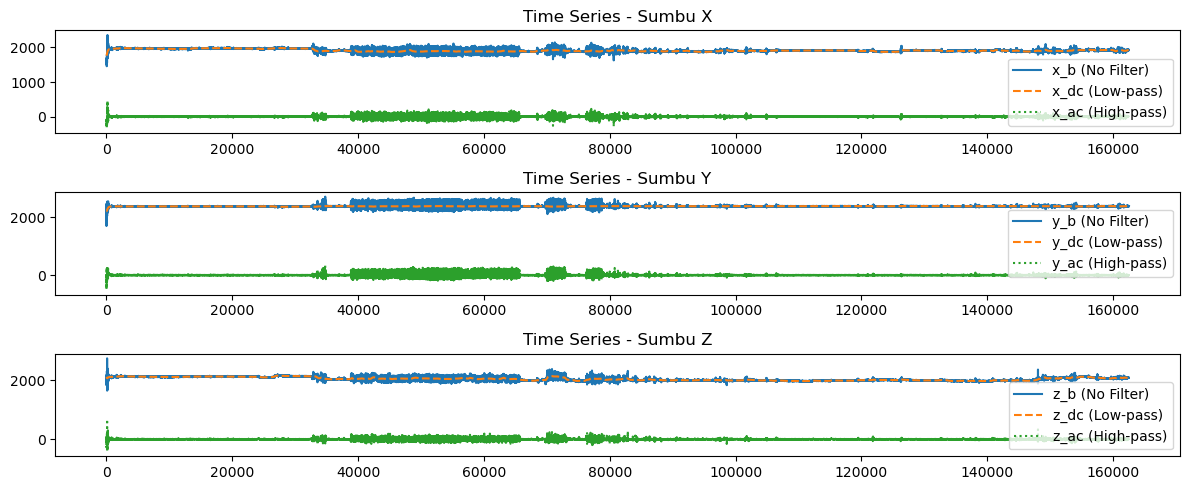

In [4]:
z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')
# Plotting hasil analisis sinyal akselerasi x, y, z dengan filter berbeda
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 5))

# Plot data akselerasi sumbu-x
axs[0].plot(x_b, label='x_b (No Filter)')
axs[0].plot(x_dc, '--', label='x_dc (Low-pass)')
axs[0].plot(x_ac, ':', label='x_ac (High-pass)')
axs[0].set_title('Time Series - Sumbu X')
axs[0].legend()

# Plot data akselerasi sumbu-y
axs[1].plot(y_b, label='y_b (No Filter)')
axs[1].plot(y_dc, '--', label='y_dc (Low-pass)')
axs[1].plot(y_ac, ':', label='y_ac (High-pass)')
axs[1].set_title('Time Series - Sumbu Y')
axs[1].legend()

# Plot data akselerasi sumbu-z
axs[2].plot(z_b, label='z_b (No Filter)')
axs[2].plot(z_dc, '--', label='z_dc (Low-pass)')
axs[2].plot(z_ac, ':', label='z_ac (High-pass)')
axs[2].set_title('Time Series - Sumbu Z')
axs[2].legend()

# Atur layout agar tidak saling bertabrakan
plt.tight_layout()
plt.show()

In [5]:
# Buat DataFrame untuk semua data dengan kolom waktu (berdasarkan indeks)
data_combined = pd.DataFrame({
    'Time': np.arange(len(x_data)),
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

# Simpan ke file CSV
save_path = r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv'
data_combined.to_csv(save_path, index=False)

print(f"Hasil berhasil disimpan ke: {save_path}")

Hasil berhasil disimpan ke: C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv


In [6]:
ya = pd.read_csv('2.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1984', '1998', '1645', '1'], dtype='object')


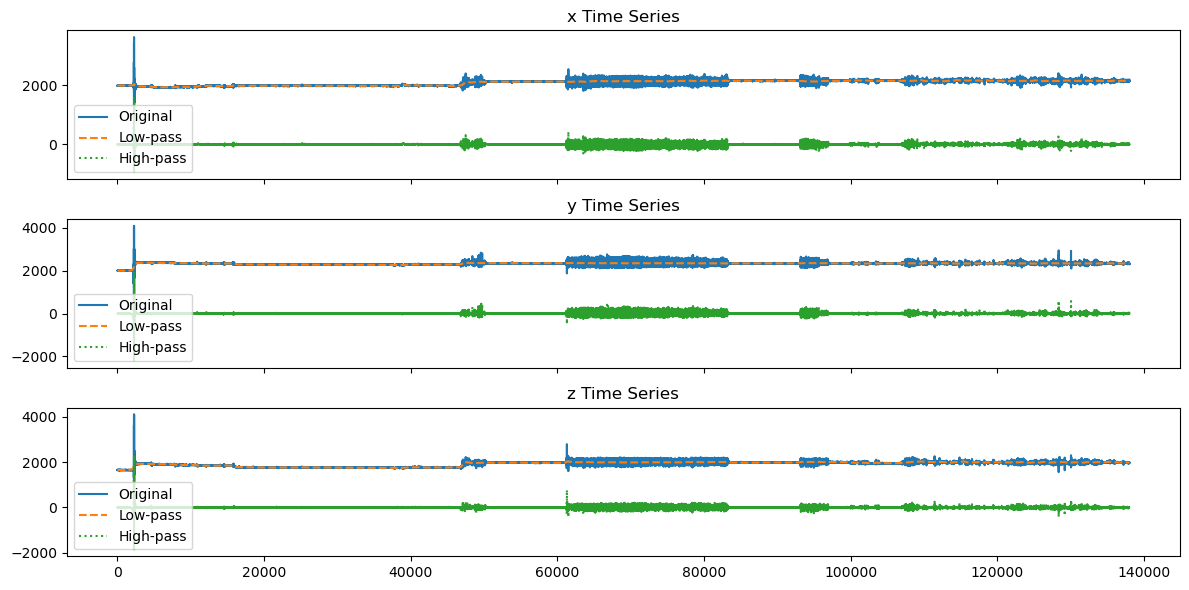

In [7]:
# Ambil data dari kolom yang sesuai
x = ya['1984']
y = ya['1998']
z = ya['1645']

# Fungsi filter butterworth
def apply_filter(signal, cutoff, fs, filter_type):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(N=1, Wn=normal_cutoff, btype=filter_type, analog=False)
    return filtfilt(b, a, signal)

# Parameter filter
fs = 1000  # Sampling frequency
cutoff = 1  # Cutoff frequency

# Fungsi bantu untuk proses semua axis
def process_signal(data):
    return {
        'b': data,
        'dc': apply_filter(data, cutoff, fs, 'low'),
        'ac': apply_filter(data, cutoff, fs, 'high')
    }

# Proses ketiga sinyal
x_filt = process_signal(x)
y_filt = process_signal(y)
z_filt = process_signal(z)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
titles = ['x Time Series', 'y Time Series', 'z Time Series']
signals = [x_filt, y_filt, z_filt]

for ax, sig, title in zip(axes, signals, titles):
    ax.plot(sig['b'], label='Original')
    ax.plot(sig['dc'], label='Low-pass', linestyle='--')
    ax.plot(sig['ac'], label='High-pass', linestyle=':')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

# Gabungkan hasil ke dalam satu DataFrame
time = np.arange(len(x))
combined_df = pd.DataFrame({
    'Time': time,
    'x_b': x_filt['b'], 'x_dc': x_filt['dc'], 'x_ac': x_filt['ac'],
    'y_b': y_filt['b'], 'y_dc': y_filt['dc'], 'y_ac': y_filt['ac'],
    'z_b': z_filt['b'], 'z_dc': z_filt['dc'], 'z_ac': z_filt['ac'],
})

# Simpan ke CSV
output_path = r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv'
combined_df.to_csv(output_path, index=False)

In [8]:
ya = pd.read_csv('3.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1928', '2382', '1943', '1'], dtype='object')


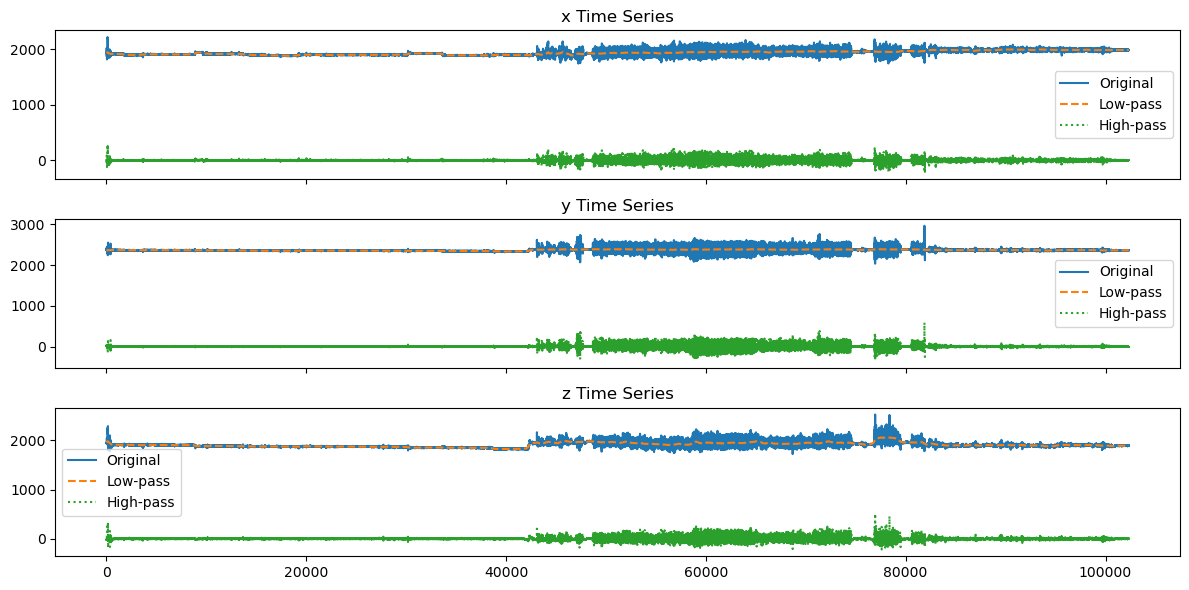

In [9]:
# Pilih kolom yang sesuai dari dataset
x = ya['1928']
y = ya['2382']
z = ya['1943']

# Fungsi filter Butterworth (low atau high)
def apply_filter(data, cutoff, fs, filter_type):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(N=1, Wn=normal_cutoff, btype=filter_type, analog=False)
    return filtfilt(b, a, data)

# Parameter filter
fs = 1000
cutoff = 1

# Fungsi bantu untuk filter sinyal
def process_signal(signal):
    return {
        'b': signal,
        'dc': apply_filter(signal, cutoff, fs, 'low'),
        'ac': apply_filter(signal, cutoff, fs, 'high')
    }

# Proses masing-masing axis
x_filt = process_signal(x)
y_filt = process_signal(y)
z_filt = process_signal(z)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
titles = ['x Time Series', 'y Time Series', 'z Time Series']
signals = [x_filt, y_filt, z_filt]

for ax, sig, title in zip(axes, signals, titles):
    ax.plot(sig['b'], label='Original')
    ax.plot(sig['dc'], label='Low-pass', linestyle='--')
    ax.plot(sig['ac'], label='High-pass', linestyle=':')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

# Gabungkan semua hasil ke DataFrame
time = np.arange(len(x))
output_df = pd.DataFrame({
    'Time': time,
    'x_b': x_filt['b'], 'x_dc': x_filt['dc'], 'x_ac': x_filt['ac'],
    'y_b': y_filt['b'], 'y_dc': y_filt['dc'], 'y_ac': y_filt['ac'],
    'z_b': z_filt['b'], 'z_dc': z_filt['dc'], 'z_ac': z_filt['ac']
})

# Simpan ke file CSV
output_path = r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv'
output_df.to_csv(output_path, index=False)

In [10]:
ya = pd.read_csv('5.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1915', '2337', '1906', '1'], dtype='object')


Kolom tersedia: ['Time', 'x_b', 'x_dc', 'x_ac', 'y_b', 'y_dc', 'y_ac', 'z_b', 'z_dc', 'z_ac']


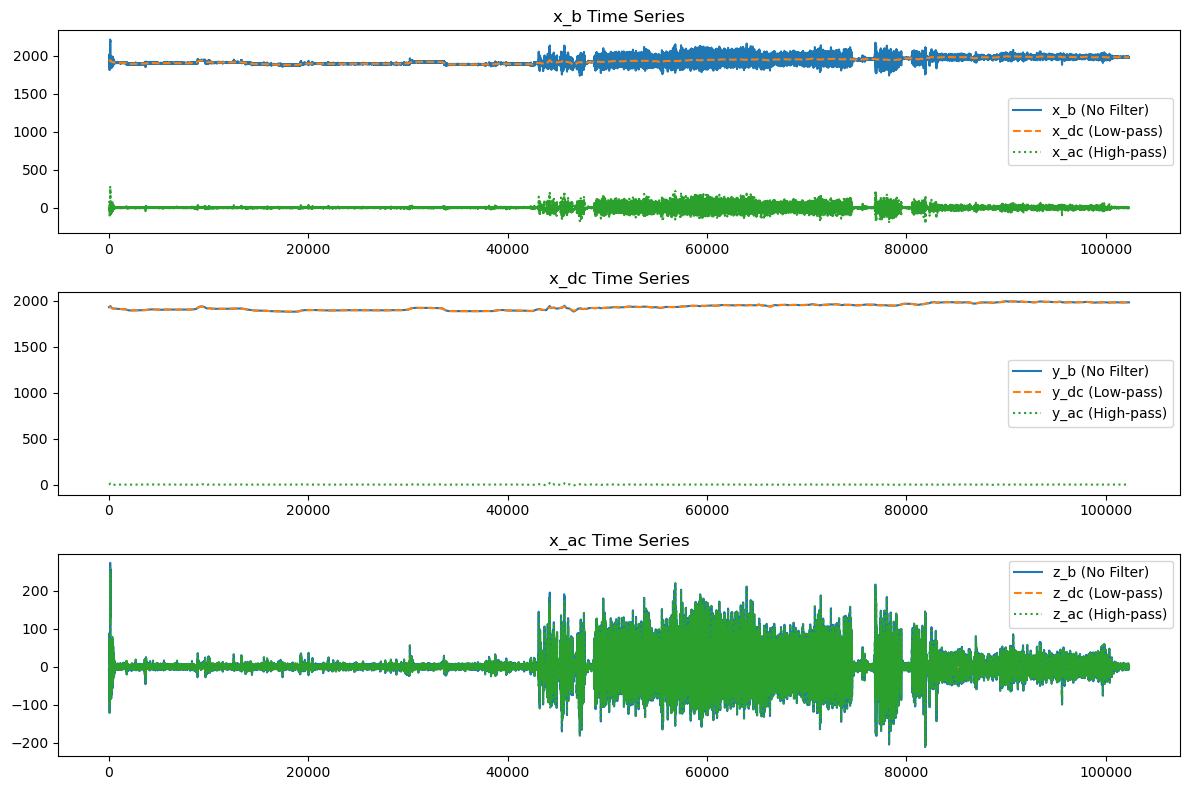

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load data
ya = pd.read_csv(r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv')  # Ganti nama file kalau perlu
ya.columns = ya.columns.str.strip()  # Hilangkan spasi di awal/akhir kolom

# Cek dan tampilkan nama kolom
print("Kolom tersedia:", ya.columns.tolist())

# Otomatis deteksi kolom berdasarkan urutan
if len(ya.columns) < 4:
    raise ValueError("Dataset tidak memiliki cukup kolom. Minimal butuh 4 kolom (waktu + 3 data).")

time_col = ya.columns[0]
x_col = ya.columns[1]
y_col = ya.columns[2]
z_col = ya.columns[3]

# Ambil data
x_data = ya[x_col]
y_data = ya[y_col]
z_data = ya[z_col]

# Filter Butterworth
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

# Parameter
fs = 1000
cutoff = 1

# Proses filter
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')
x_ac = butter_filter(x_b, cutoff, fs, btype='high')

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

# x
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title(f'{x_col} Time Series')
ax1.legend()

# y
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title(f'{y_col} Time Series')
ax2.legend()

# z
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title(f'{z_col} Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

# Simpan hasil ke CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

output_path = r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv'
output_data.to_csv(output_path, index=False, header=True)




In [26]:
ya = pd.read_csv('4.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '2045', '2326', '1833', '1'], dtype='object')


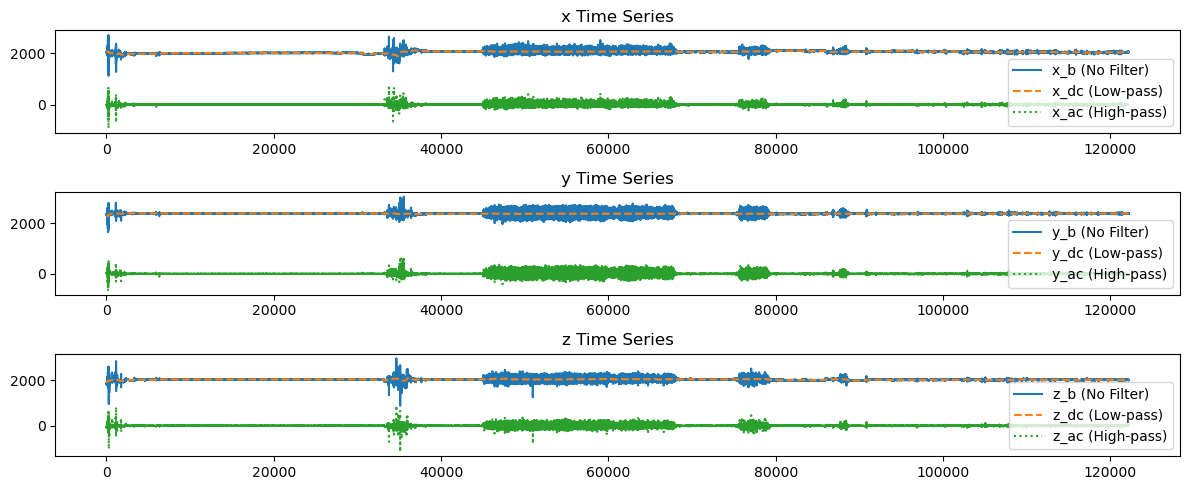

In [27]:
x_data = ya['2045']  
y_data = ya['2326']  
z_data = ya['1833']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)
output_df.to_csv(output_path, index=False)


In [20]:
ya = pd.read_csv('5.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1915', '2337', '1906', '1'], dtype='object')


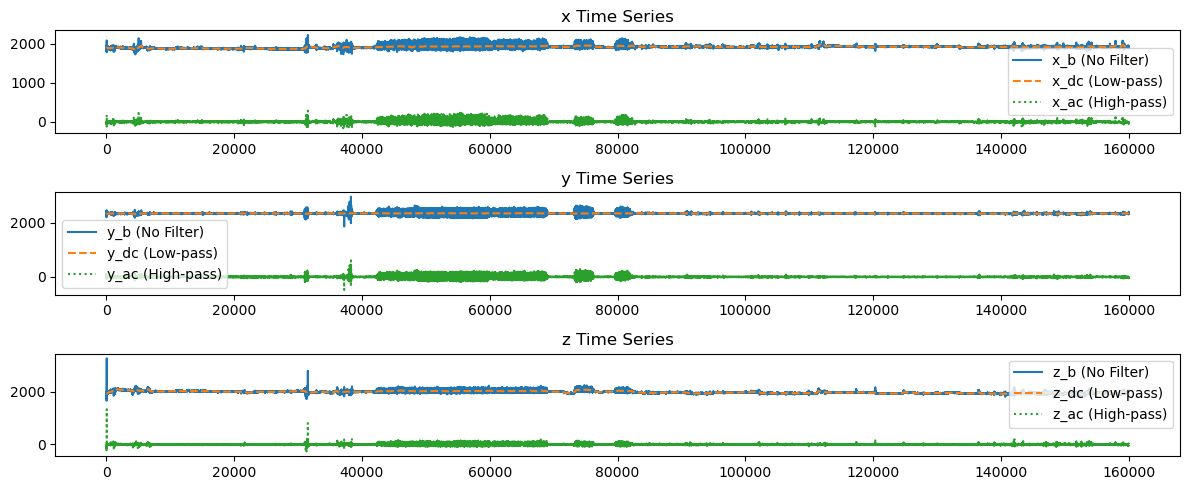

In [22]:
x_data = ya['1915']  
y_data = ya['2337']  
z_data = ya['1906']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r'C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv', index=False, header=True)


In [28]:
ya = pd.read_csv('6.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1953', '1979', '1629', '1'], dtype='object')


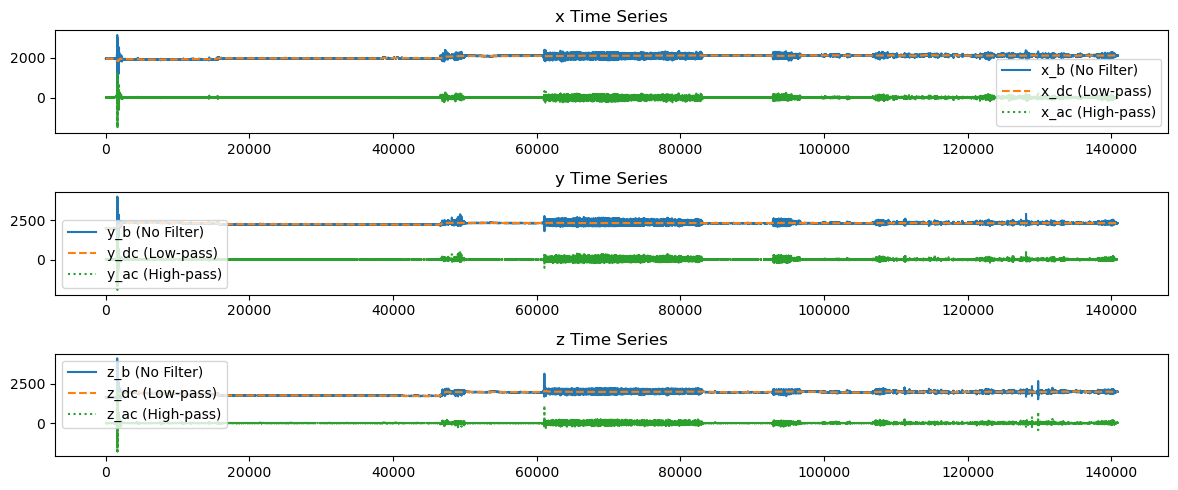

In [29]:
x_data = ya['1953']  
y_data = ya['1979']  
z_data = ya['1629']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [30]:
ya = pd.read_csv('7.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1892', '2279', '1781', '1'], dtype='object')


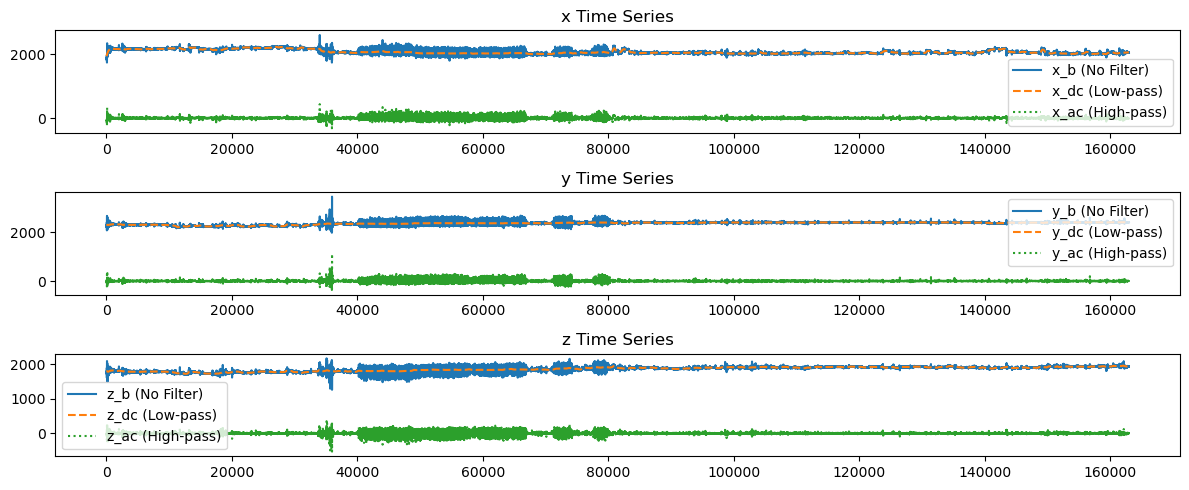

In [31]:
x_data = ya['1892']  
y_data = ya['2279']  
z_data = ya['1781']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [32]:
ya = pd.read_csv('8.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '2057', '2043', '1665', '1'], dtype='object')


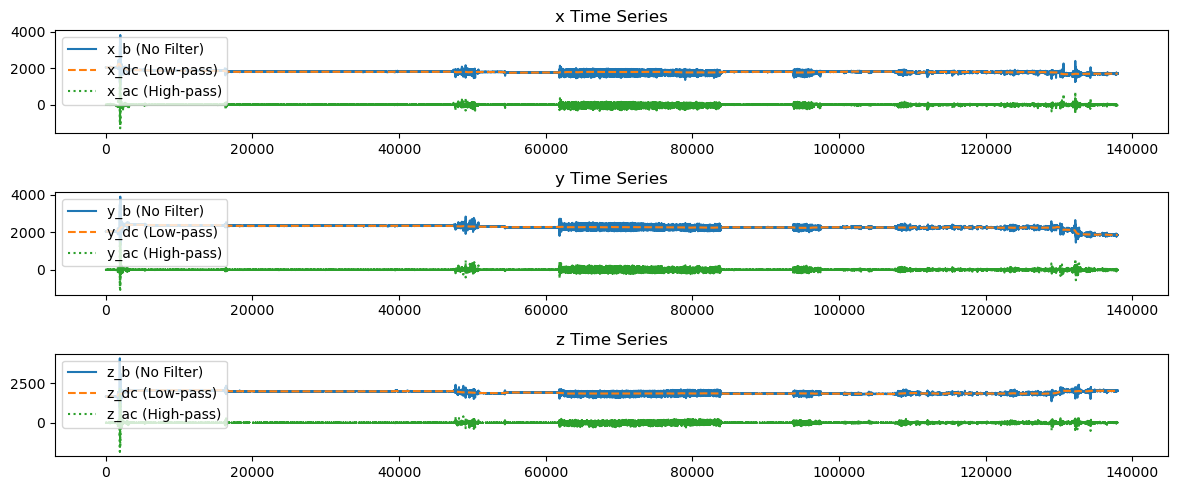

In [33]:
x_data = ya['2057']  
y_data = ya['2043']  
z_data = ya['1665']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [34]:
ya = pd.read_csv('9.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '2287', '2948', '2189', '1'], dtype='object')


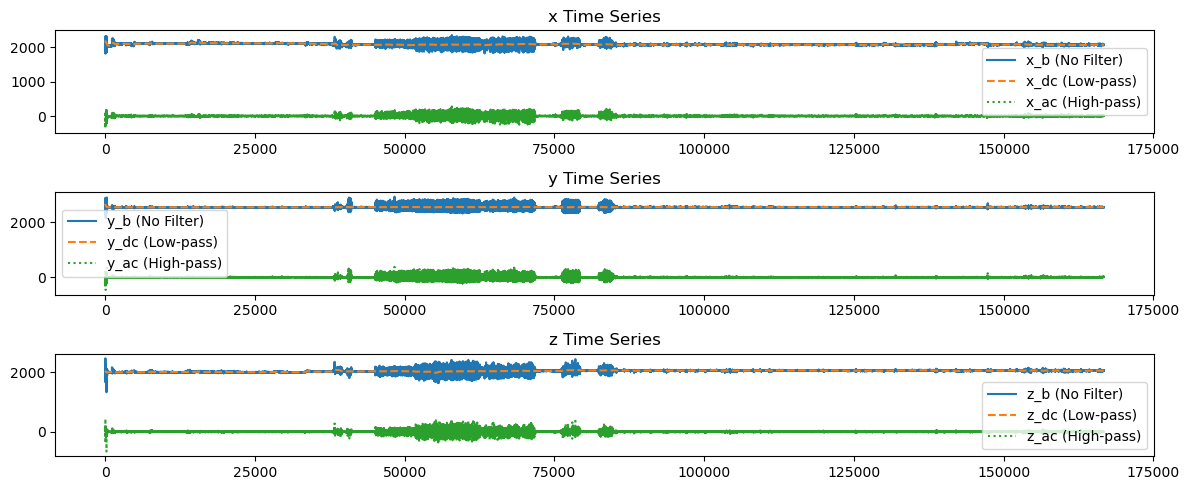

In [35]:
x_data = ya['2287']  
y_data = ya['2948']  
z_data = ya['2189']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [36]:
ya = pd.read_csv('10.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '2082', '2165', '1702', '1'], dtype='object')


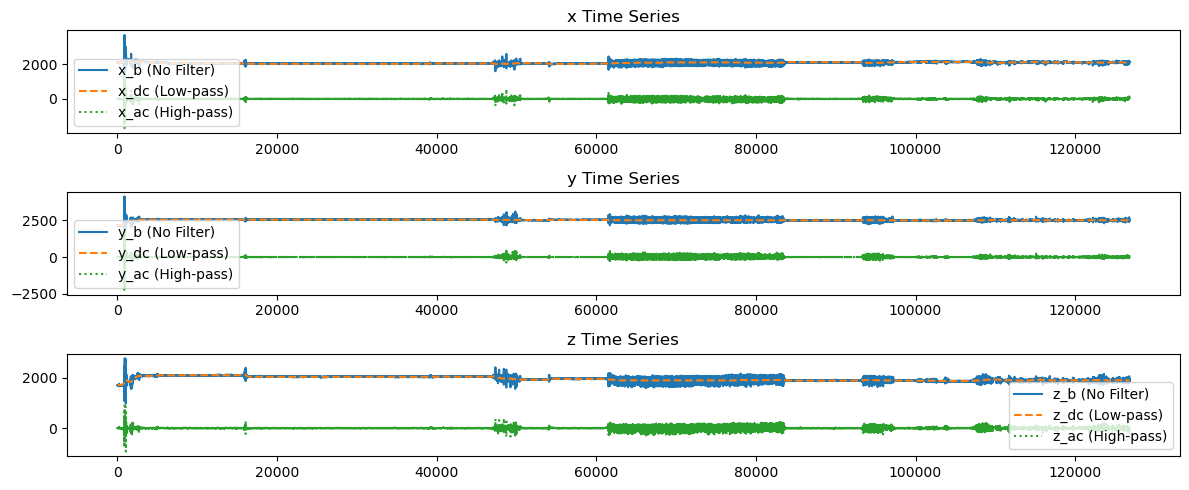

In [37]:
x_data = ya['2082']  
y_data = ya['2165']  
z_data = ya['1702']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [38]:
ya = pd.read_csv('11.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1983', '2438', '1825', '1'], dtype='object')


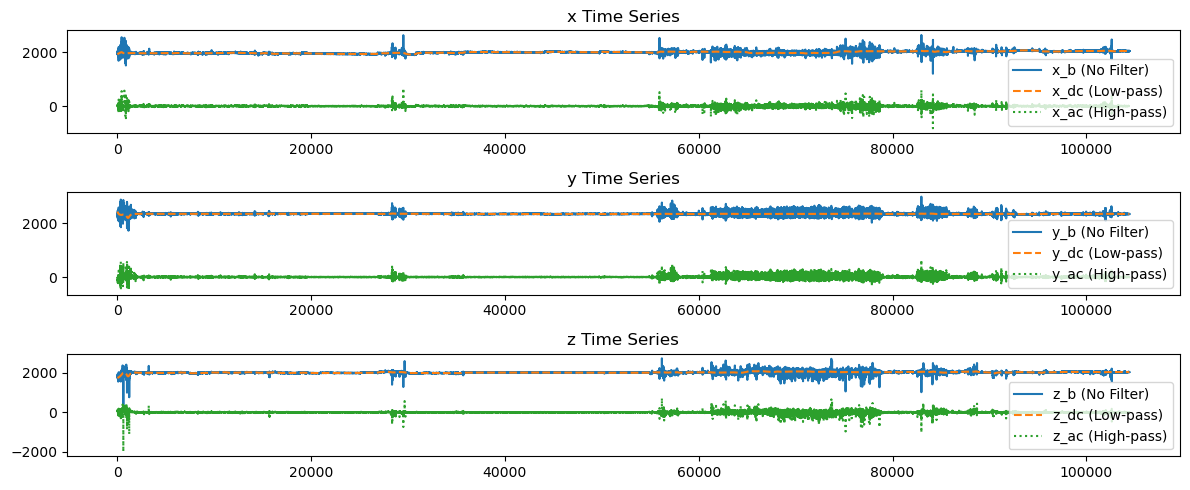

In [39]:
x_data = ya['1983']  
y_data = ya['2438']  
z_data = ya['1825']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [40]:
ya = pd.read_csv('12.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1922', '2388', '1898', '1'], dtype='object')


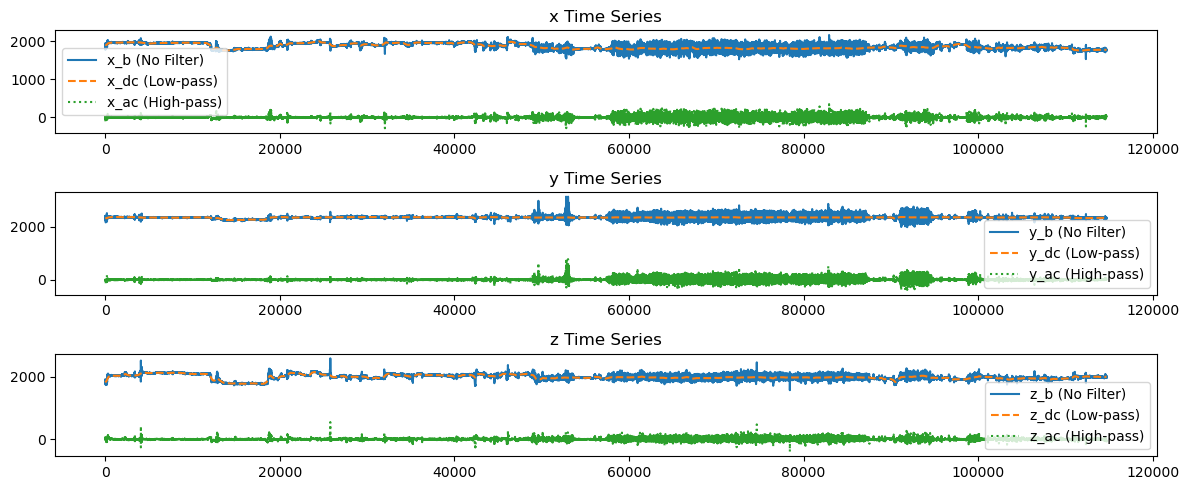

In [41]:
x_data = ya['1922']  
y_data = ya['2388']  
z_data = ya['1898']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [42]:
ya = pd.read_csv('13.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1820', '2181', '1589', '1'], dtype='object')


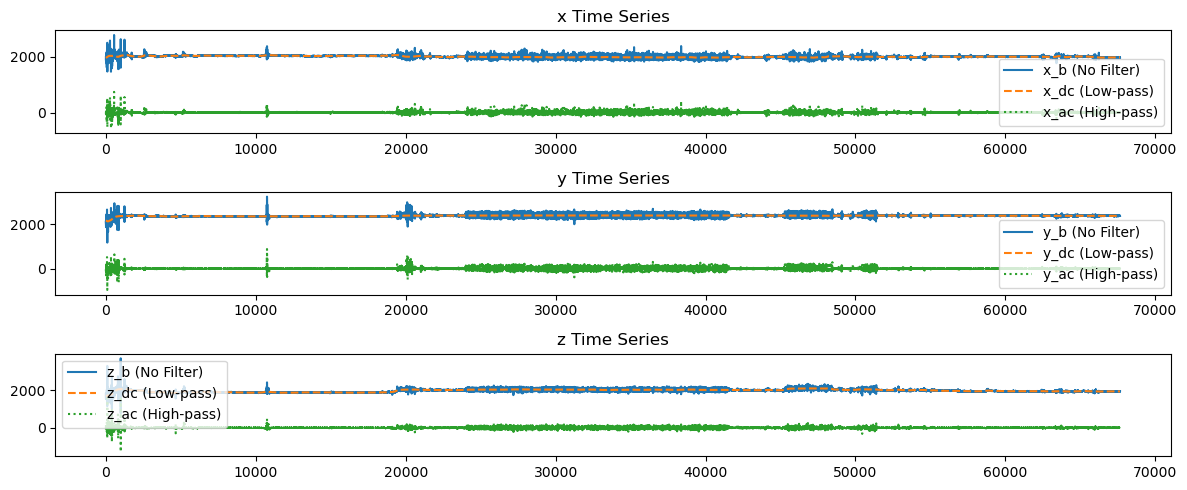

In [43]:
x_data = ya['1820']  
y_data = ya['2181']  
z_data = ya['1589']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)


In [44]:
ya = pd.read_csv('14.csv')
print(f'Nama Kolom: {ya.columns}')

Nama Kolom: Index(['0', '1955', '2302', '1766', '1'], dtype='object')


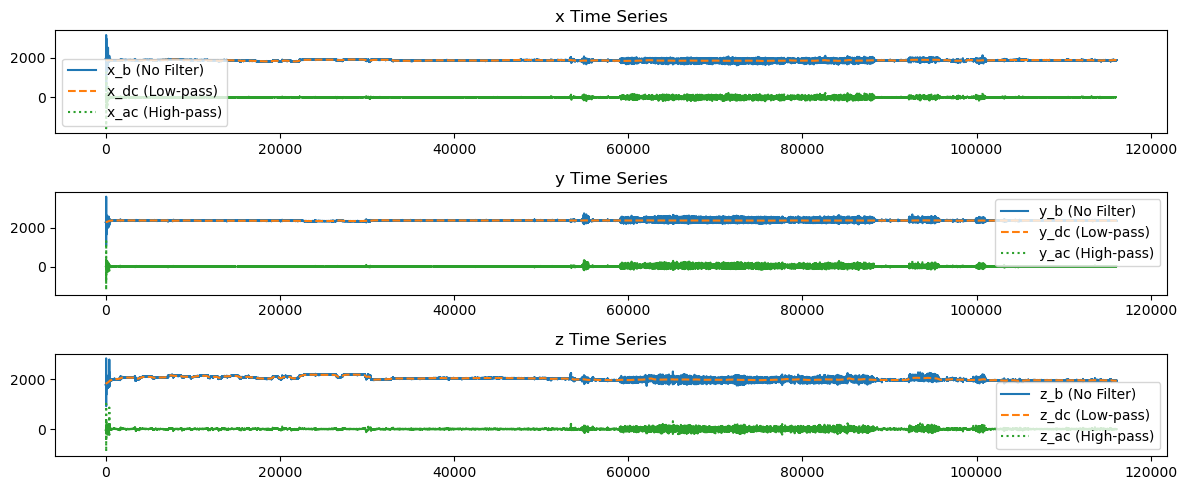

In [45]:
x_data = ya['1955']  
y_data = ya['2302']  
z_data = ya['1766']  

#Mmenerapkan low-pass dan high-pass filter
def butter_filter(data, cutoff, fs, btype='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

#Frekuensi sampling dan frekuensi cutoff 
fs = 1000  
cutoff = 1  

#Menerapkan filter pada setiap data
x_b = x_data
x_dc = butter_filter(x_b, cutoff, fs, btype='low')  
x_ac = butter_filter(x_b, cutoff, fs, btype='high')  

y_b = y_data
y_dc = butter_filter(y_b, cutoff, fs, btype='low')
y_ac = butter_filter(y_b, cutoff, fs, btype='high')

z_b = z_data
z_dc = butter_filter(z_b, cutoff, fs, btype='low')
z_ac = butter_filter(z_b, cutoff, fs, btype='high')

#Plotting hasil analisis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 5))

#Plot untuk x data
ax1.plot(x_b, label='x_b (No Filter)')
ax1.plot(x_dc, label='x_dc (Low-pass)', linestyle='--')
ax1.plot(x_ac, label='x_ac (High-pass)', linestyle=':')
ax1.set_title('x Time Series')
ax1.legend()

#Plot untuk y data
ax2.plot(y_b, label='y_b (No Filter)')
ax2.plot(y_dc, label='y_dc (Low-pass)', linestyle='--')
ax2.plot(y_ac, label='y_ac (High-pass)', linestyle=':')
ax2.set_title('y Time Series')
ax2.legend()

#Plot untuk z data
ax3.plot(z_b, label='z_b (No Filter)')
ax3.plot(z_dc, label='z_dc (Low-pass)', linestyle='--')
ax3.plot(z_ac, label='z_ac (High-pass)', linestyle=':')
ax3.set_title('z Time Series')
ax3.legend()

plt.tight_layout()
plt.show()

#Menyimpan hasil ke dalam CSV (untuk setiap time series)
header = 'Time, x_b, x_dc, x_ac, y_b, y_dc, y_ac, z_b, z_dc, z_ac'

#Menggabungkan data dalam satu file CSV
output_data = pd.DataFrame({
    'Time': np.arange(len(x_data)),  # Waktu dalam bentuk indeks
    'x_b': x_b, 'x_dc': x_dc, 'x_ac': x_ac,
    'y_b': y_b, 'y_dc': y_dc, 'y_ac': y_ac,
    'z_b': z_b, 'z_dc': z_dc, 'z_ac': z_ac
})

#Menyimpan ke dalam file CSV
output_data.to_csv(r"C:\Users\MANDA\Documents\SEMESTER 6\output hw7 slide 4-6.csv", index=False, header=True)